<a href="https://colab.research.google.com/github/fabiobrau/PCA/blob/main/notebooks/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm

Generate the data samples

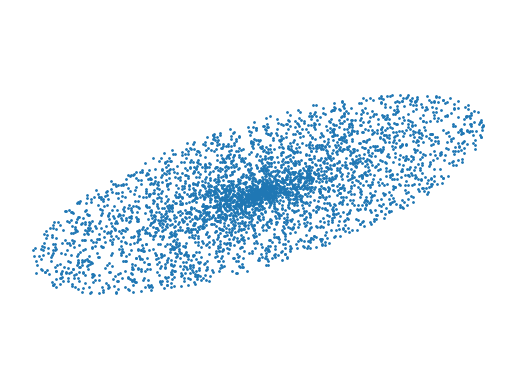

In [97]:
N = 4000

# Let's generate an ellipsis
theta = np.random.rand(N) # Random angles
r = np.random.rand(N) # Random distances

ratio = 0.3
angle = 0.05*2*np.pi
x = r*np.sin((theta)*2*np.pi)
y = ratio*r*np.cos((theta)*2*np.pi)
z = 0.07*np.random.randn(N) # Point on a third axis


X = np.matrix(np.concatenate([x.reshape(-1,1), y.reshape(-1,1), z.reshape(-1,1)],axis=1))
rot_matrix = np.matrix([[np.cos(angle), -np.sin(angle),0],[np.sin(angle), np.cos(angle), 0],[0,0,1]])
X = (rot_matrix@X.T).T

X = np.array(X)
# Represnt the data (only 2d)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1],s=1.)
ax.axis('equal')
ax.set_axis_off()
plt.show()

Show the directions on a three dimensional space

In [98]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Principal directions are the axis of the ellipsoid
v1 = np.array(rot_matrix[:, 0]).squeeze()
v2 = np.array(rot_matrix[:, 1]).squeeze()
v3 = np.array(rot_matrix[:, 2]).squeeze()


df = pd.DataFrame(X,columns=['X','Y','Z'])
df_v1 = pd.DataFrame([[0,0,0],v1], columns=['X','Y','Z'])
df_v2 = pd.DataFrame([[0,0,0],v2], columns=['X','Y','Z'])
df_v3 = pd.DataFrame([[0,0,0],v3], columns=['X','Y','Z'])

fig = go.Figure(data=[go.Scatter3d(x=df.X, y=df.Y, z=df.Z,
                                   name='samples',
                                   mode='markers',
                                   marker=dict(size=2, colorscale='greys', opacity=0.5),
                                   )])
## v2
fig.add_scatter3d(connectgaps=None, x = df_v1.X.values, y = df_v1.Y.values, z = df_v1.Z.values,
                 name='First Principal Component',
                 mode='lines+markers',
                 line=dict(width=6),
                 marker=dict(symbol='diamond', size=3),
                 visible='legendonly'
                 )
fig.add_scatter3d(connectgaps=None, x = df_v2.X.values, y = df_v2.Y.values, z = df_v2.Z.values,
                 name='Second Principal Component',
                 mode='lines+markers',
                 line=dict(width=6),
                 marker=dict(symbol='diamond', size=3),
                 visible='legendonly'
                 )

fig.add_scatter3d(connectgaps=None, x = df_v3.X.values, y = df_v3.Y.values, z = df_v3.Z.values,
                 name='Third Principal Component',
                 mode='lines+markers',
                 line=dict(width=6),
                 marker=dict(symbol='diamond', size=3),
                 visible='legendonly'
                 )
# Projections
fig.add_scatter3d(x=df.X, y=df.Y, z=df.Z,
                   name='projections',
                   mode='markers',
                   opacity=0,
                   marker=dict(size=2, colorscale='greys_r'),
                   projection=dict(x=dict(show=True, opacity=1), y=dict(show=True, opacity=1), z=dict(show=True, opacity=1)),
                   visible='legendonly'
                  )


fig.update_layout(scene_aspectmode='cube',
                  scene =dict(
                      xaxis=dict(nticks=2, range=[-1,1]),
                      yaxis=dict(nticks=2, range=[-1,1]),
                      zaxis=dict(nticks=2, range=[-1,1])
                  )
                 )
fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False)
fig.show()
